In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
from IPython.core.display import display


In [2]:
sleep = pd.read_csv('../data/SleepStudyData.csv')

Description of data

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?


In [3]:
display(sleep.head())

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [4]:
# check for missing values

print(sleep.shape)
print(sleep.isnull().sum())
print('\n')

# check whether any missing or error values
for col in sleep.columns.tolist():
    print(col, sleep[col].unique())

(104, 6)
Enough        0
Hours         2
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64


Enough ['Yes' 'No']
Hours [ 8.  6.  7.  4. 10.  9.  2.  5. nan]
PhoneReach ['Yes' 'No']
PhoneTime ['Yes' 'No']
Tired [3 2 4 5 1]
Breakfast ['Yes' 'No']


In [5]:
# check where missing values in sleep

missing_hours = sleep.loc[sleep['Hours'].isnull()]
print(sleep.isnull().sum() / len(sleep))

# decide to drop this missing values as its < 2% of total records
sleep.drop(missing_hours.index, inplace=True)
sleep.isnull().sum()

Enough        0.000000
Hours         0.019231
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64


Enough        0
Hours         0
PhoneReach    0
PhoneTime     0
Tired         0
Breakfast     0
dtype: int64

In [12]:
# check dtypes and see if any conversion needed
sleep.dtypes


Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object

Dtypes were checked to make sure there would not be any interference in future options with data.

Often I would convert object to string dtype but because intent of this notebook is storytelling and object dtype will
not disrupt other operations this will not be changed for now.

Next step is look at column distributions indvidually before proceeding wiht more eda operations

['Enough', 'Hours', 'PhoneReach', 'PhoneTime', 'Tired', 'Breakfast']


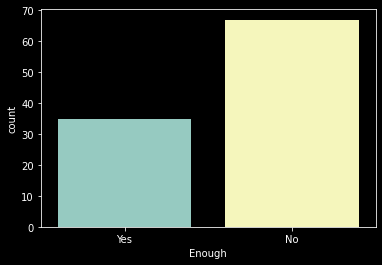

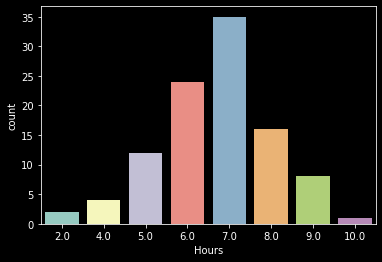

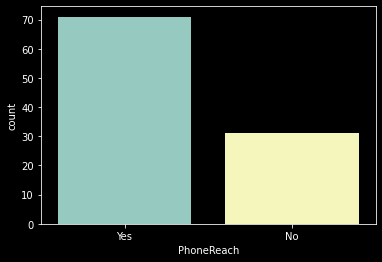

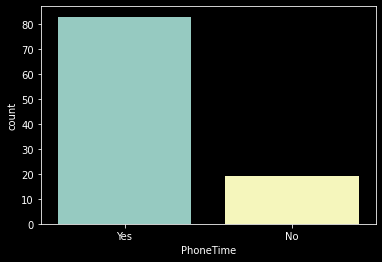

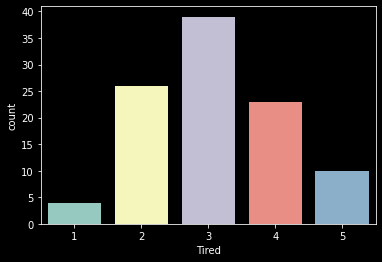

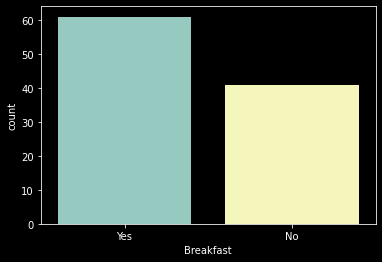

In [24]:
# make plots to show distribution of column data
sleep_columns = sleep.columns.tolist()

for col in sleep_columns:
    sns.countplot(data=sleep, x=col)
    plt.show()

* distribution viewing gives us a little bit context in our problem (?q question would there be a better way to present
this info in a more digestible manner rather than many countplots?)
* It appears that hours and tired have normal distributions
* whereas in the nominal columns we have some skew
* PhoneReach, PhoneTime, Breakfast tend to be yes whereas Enough sleep tend to be No

Next will try to perform some clustering

In [9]:
# perform clustering than perform correlation and cramers v
sleep


,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes
...,...,...,...,...,...,...
99,No,7.0,Yes,Yes,2,Yes
100,No,7.0,No,Yes,3,Yes
101,Yes,8.0,Yes,Yes,3,Yes
102,Yes,7.0,Yes,Yes,2,Yes
